In [9]:
# Necessary imports

import pandas as P

# Load data

data = P.read_csv('habits.csv',
                 sep = ';',
                 na_values = '?')
print(data)

     kohde  jasen  pvknro  sp  ASALUE  IKAL1   V1  V5   V7 V21  ... V40 V68  \
0    50002      1       1   1     1.0      6    0   0    0   0  ...   0   0   
1    50002      1       2   1     1.0      6  380  10    0   0  ...   0  10   
2    50003      1       1   2     2.0      5    0  60  NaN  50  ...   0  30   
3    50003      1       2   2     2.0      5    0  50   10  50  ...   0   0   
4    50004      2       1   1     1.0      7  640   0  NaN   0  ...   0   0   
..     ...    ...     ...  ..     ...    ...  ...  ..  ...  ..  ...  ..  ..   
740  51980      1       2   2     2.0      6  460  20    0   0  ...   0  30   
741  51981      2       1   1     1.0      5    0   0    0   0  ...   0   0   
742  51981      2       2   1     1.0      5    0   0    0  10  ...   0   0   
743  51983      1       1   2     3.0      8  NaN  40   30   0  ...   0  20   
744  51983      1       2   2     3.0      8    0  90   10   0  ...   0  30   

     V69  V70 V75 H1a_A H1b_A H1g_A H1h_A  H1i_A  


In [29]:
# Necessary imports

import pandas as P

# Load data

data = P.read_csv('habits.csv',
                 sep = ';',
                 na_values = '?')

# Choose columns which describe time spent on an activity, fill out missing values with 0

total_time = data.iloc[:,6:19]
total_time = total_time.fillna(0)

# Have to iterate whole dataframe to convert minutes to seconds

for column in total_time:
    data = total_time[column]
    row_number = 0

    for item in data:
        actual_value = 0
        
        if isinstance(item, str):
            if item.find(':') != -1:
                new_value = 0
                minutes = int(item[1:2])
                seconds = int(item[3:5])
                new_value = minutes * 60 + seconds
                total_time.loc[row_number, column] = new_value
            else:
                new_value = int(item) * 60
                total_time.loc[row_number, column] = new_value
                
        row_number += 1

total_time = total_time.div(60)
print(total_time.mean())

new_data = P.read_csv('habits.csv',
                 sep = ';',
                 na_values = '?')

places_visited = new_data.iloc[:,19:24]
places_visited.fillna(0)
print(places_visited.sum().to_string())

V1     107.344072
V5      28.644966
V7       9.592394
V21     10.037808
V22      4.430649
V27     19.889485
V32    458.563311
V33     76.653691
V40      0.831991
V68     42.288591
V69      6.859284
V70    126.712528
V75      5.553244
dtype: object
H1a_A    2356.0
H1b_A    2290.0
H1g_A    2811.0
H1h_A    1427.0
H1i_A    2160.0


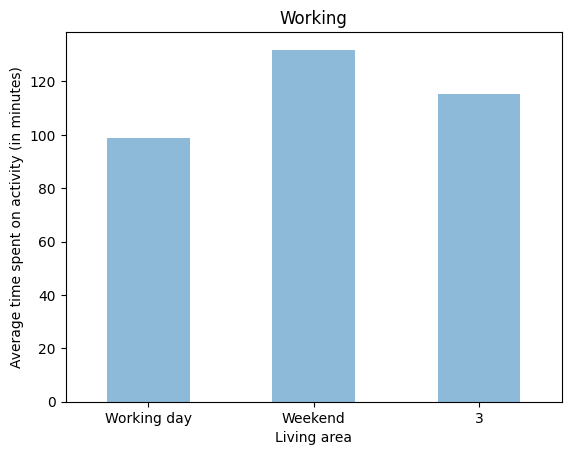

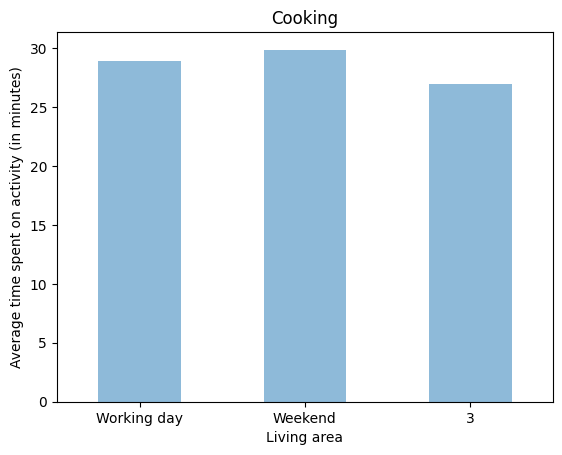

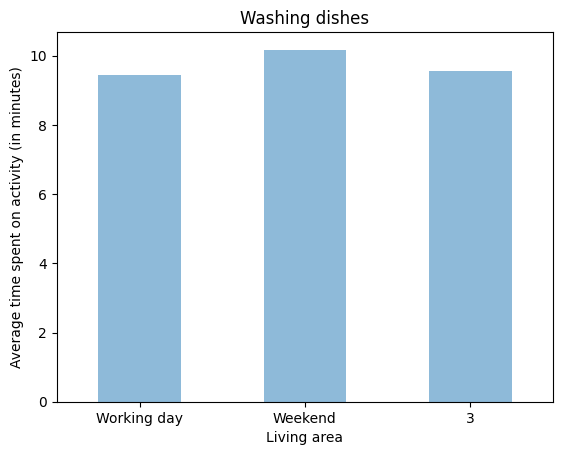

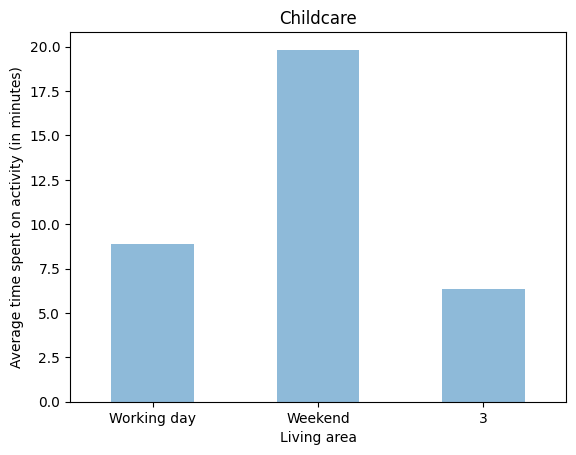

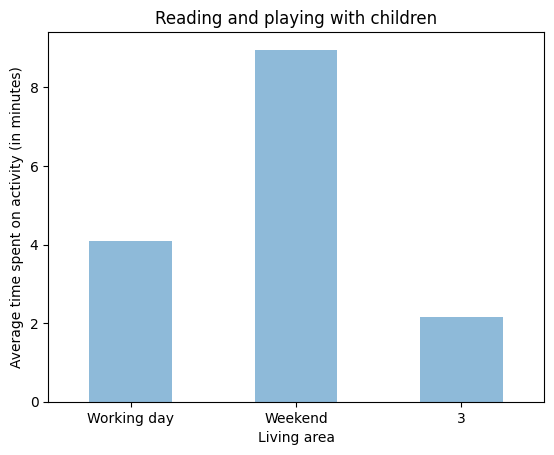

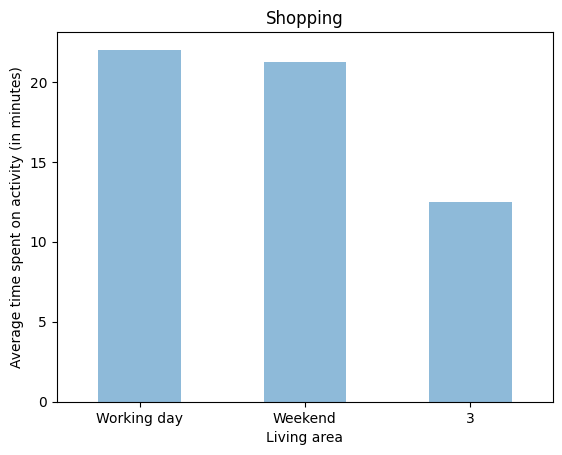

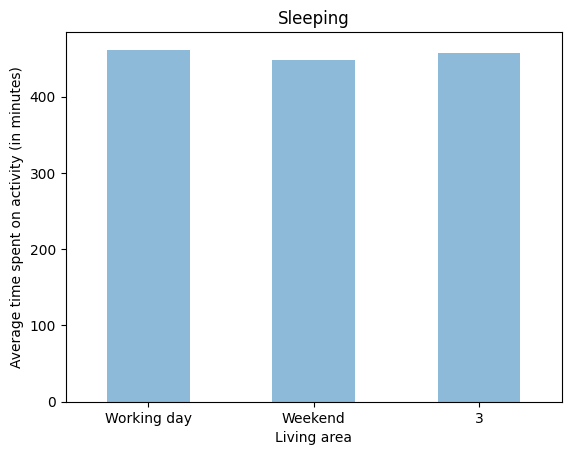

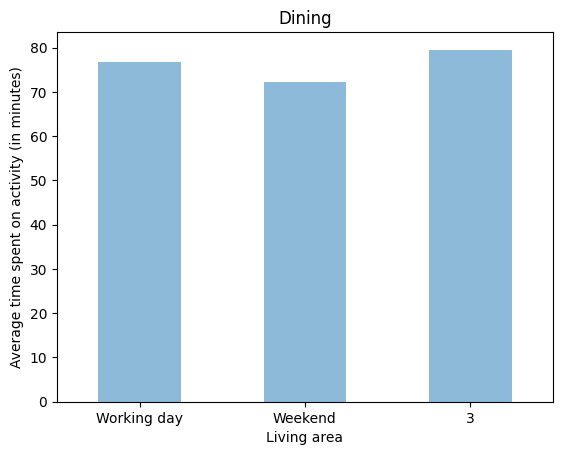

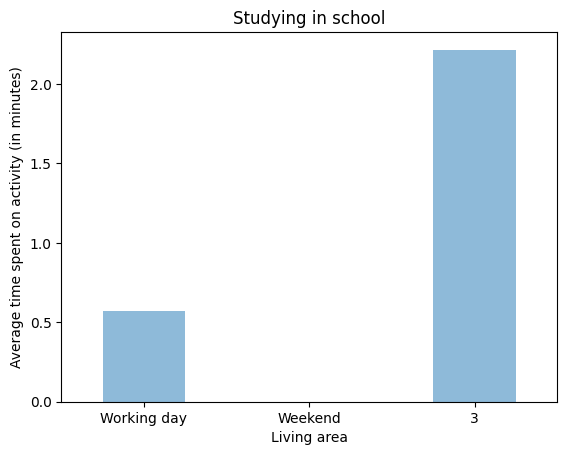

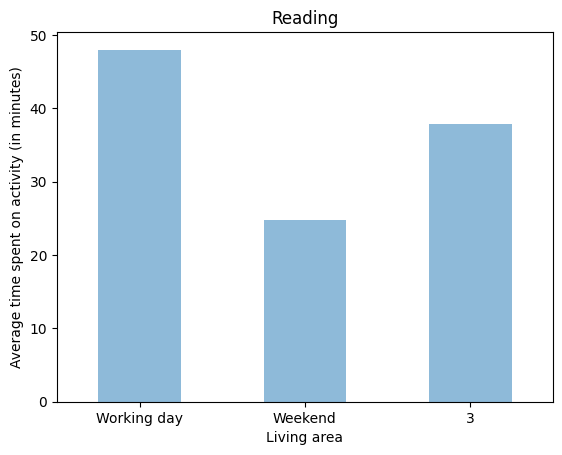

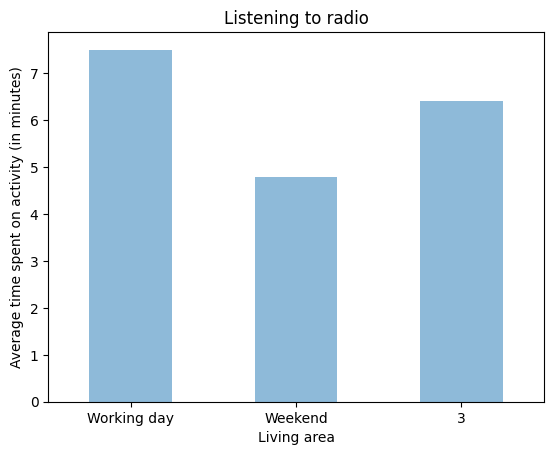

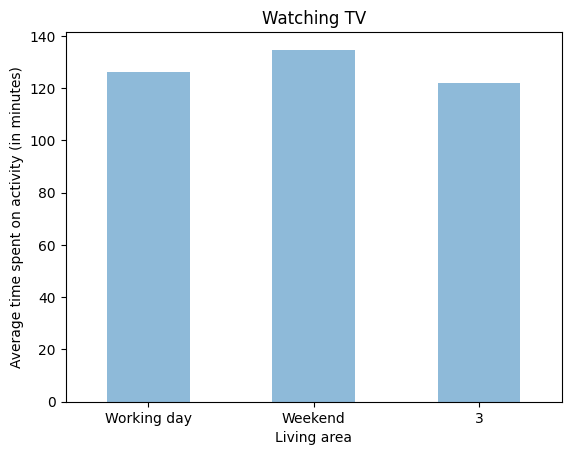

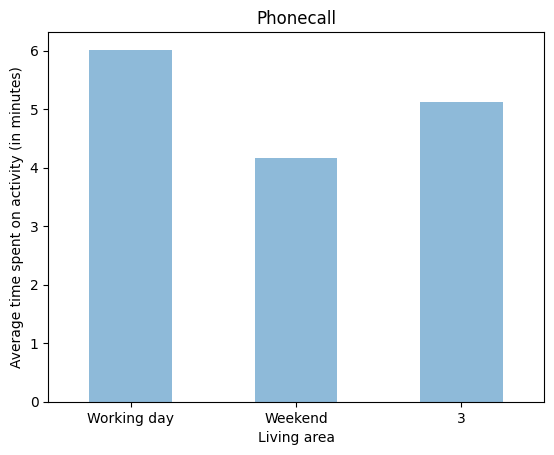

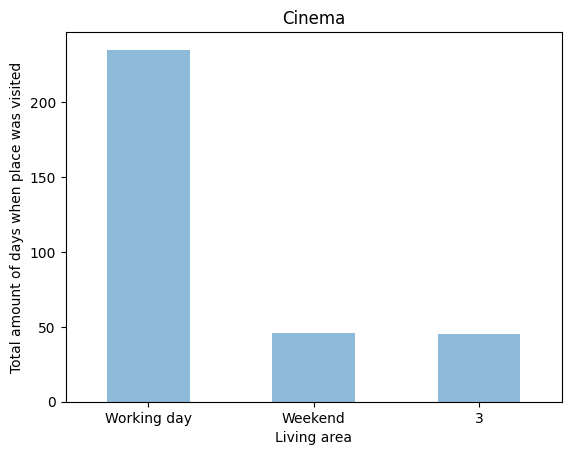

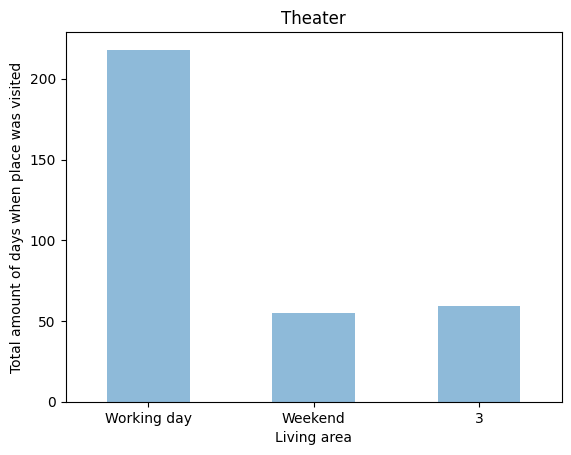

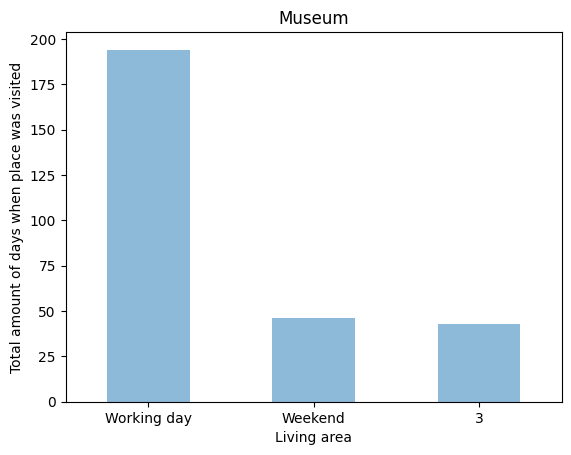

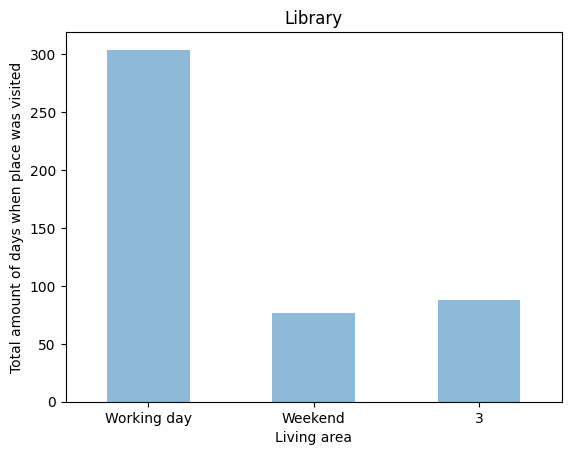

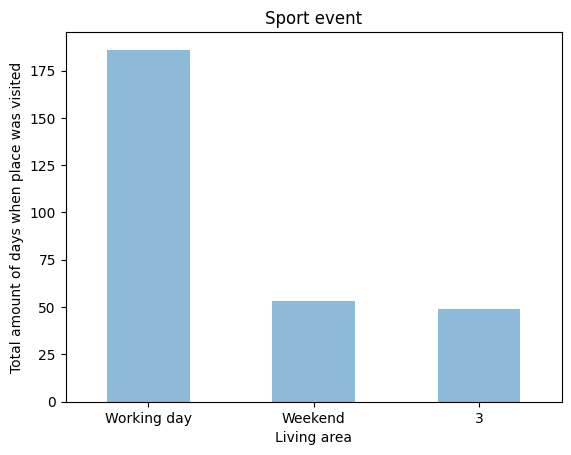

In [56]:
# Necessary imports

import pandas as P
import matplotlib.pyplot as plt

# Load data

data = P.read_csv('habits.csv',
                 sep = ';',
                 na_values = '?')

total_time_environments = data.iloc[:, [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]]
total_time_environments = total_time_environments.fillna(0)

for column in total_time_environments:
    data = total_time_environments[column]
    row_number = 0

    for item in data:
        actual_value = 0
        
        if isinstance(item, str):
            if item.find(':') != -1:
                actual_value = item[1:2]
                total_time_environments.loc[row_number, column] = actual_value

        if column == 'H1a_A' or column == 'H1b_A' or column == 'H1g_A' or column == 'H1h_A' or column == 'H1i_A':
            if item != 1 and item != 2:
                total_time_environments.loc[row_number, column] = 0
            else:
                total_time_environments.loc[row_number, column] = (item - 2) * -1
                
        row_number += 1

total_time_environments = total_time_environments.astype(int)
grouped = total_time_environments.iloc[:, 0:14].groupby('ASALUE').mean()
categorical = total_time_environments.iloc[:, [0, 14, 15, 16, 17, 18]].groupby('ASALUE').sum()

grouped = grouped.rename(columns = {"V1": "Working", "V5": "Cooking", "V7": "Washing dishes", "V21": "Childcare", "V22": "Reading and playing with children", "V27": "Shopping", "V32": "Sleeping", "V33": "Dining", "V40": "Studying in school", "V68": "Reading", "V69": "Listening to radio", "V70": "Watching TV", "V75": "Phonecall"})    
categorical = categorical.rename(columns = {"H1a_A": "Cinema", "H1b_A": "Theater", "H1g_A": "Museum", "H1h_A": "Library", "H1i_A": "Sport event"})

grouped = grouped.rename(index = {1: "City", 2: "Municipality", 3: "Rural area"})
categorical = categorical.rename(index = {1: "City", 2: "Municipality", 3: "Rural area"})

for column in grouped:
    grouped[column].plot(kind = 'bar', alpha = 0.5)
    plt.title(f'{column}')
    plt.xlabel('Living area')
    plt.ylabel('Average time spent on activity (in minutes)')
    plt.xticks(rotation = 0)
    plt.show()

for column in categorical:
    categorical[column].plot(kind = 'bar', alpha = 0.5)
    plt.title(f'{column}')
    plt.xlabel('Living area')
    plt.ylabel('Total amount of days when place was visited')
    plt.xticks(rotation = 0)
    plt.show()

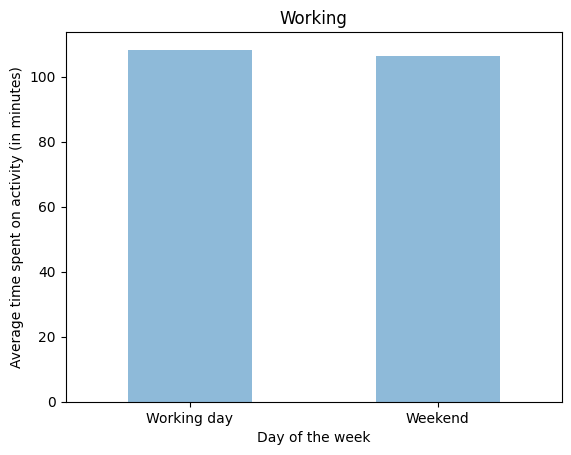

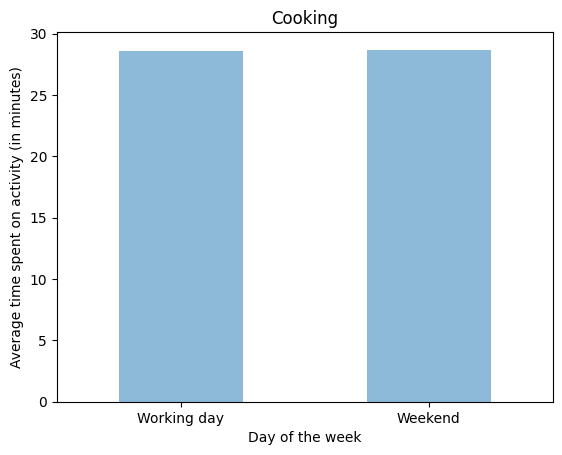

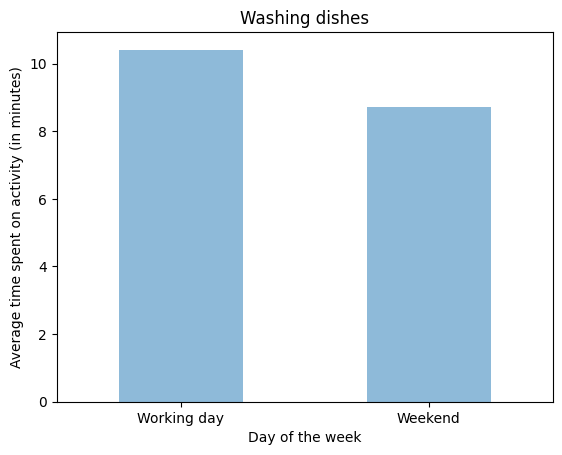

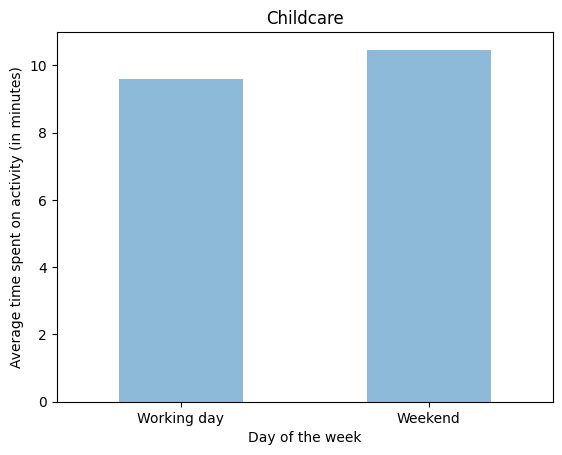

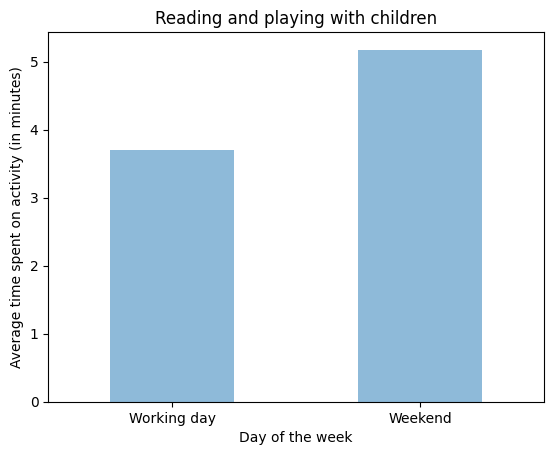

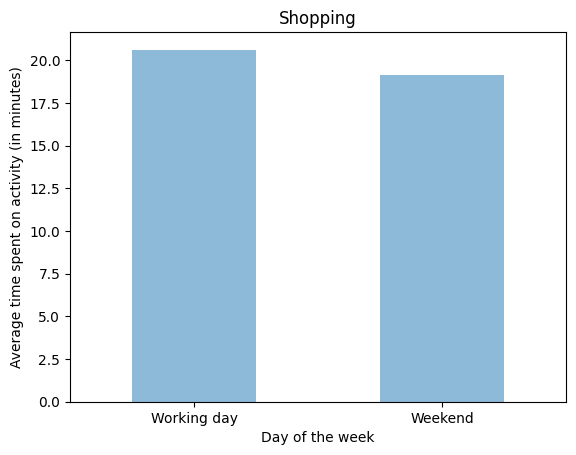

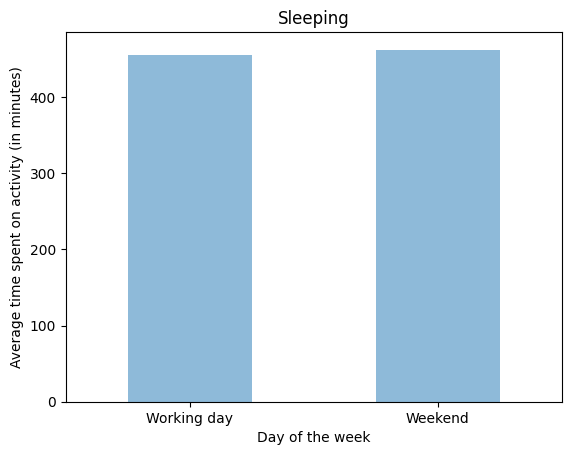

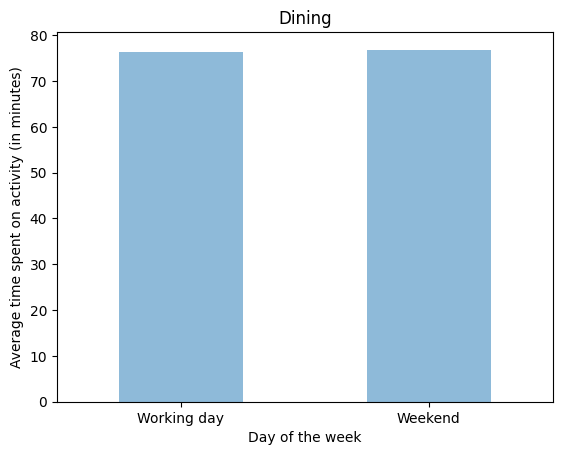

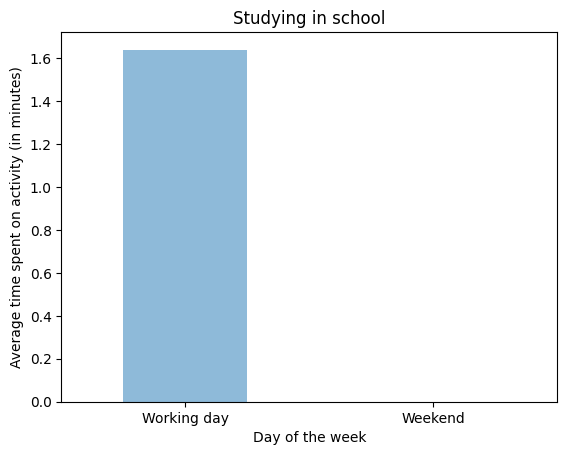

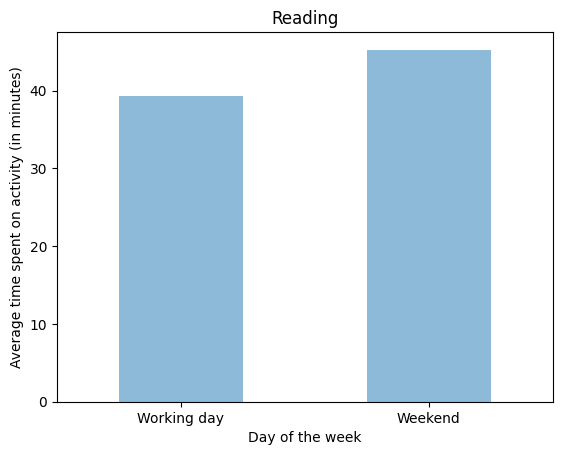

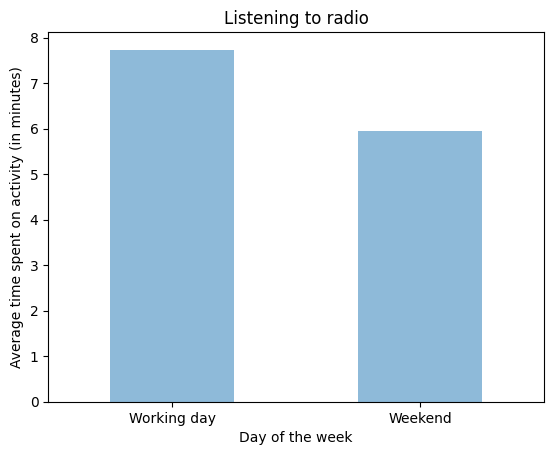

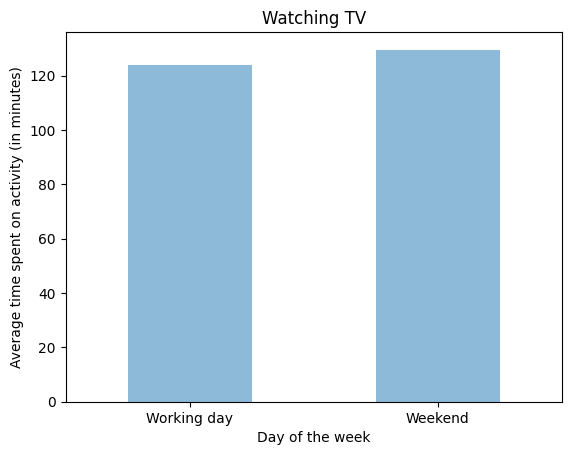

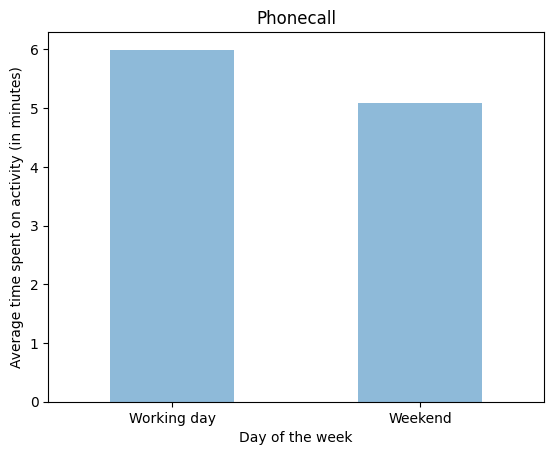

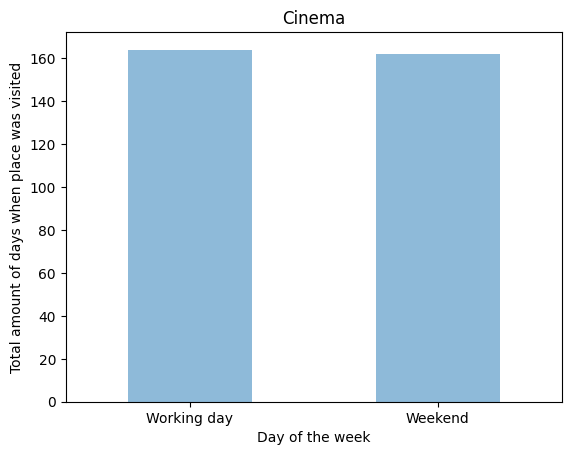

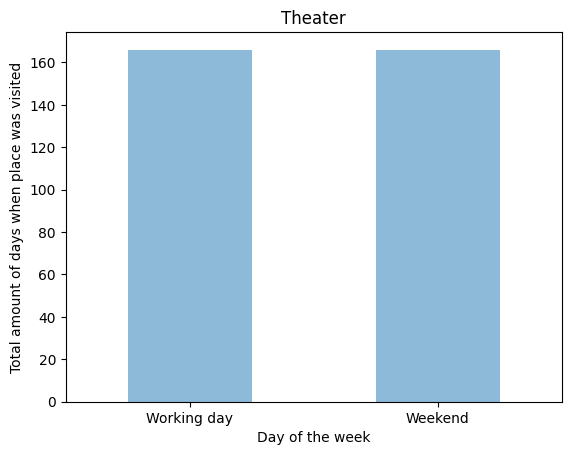

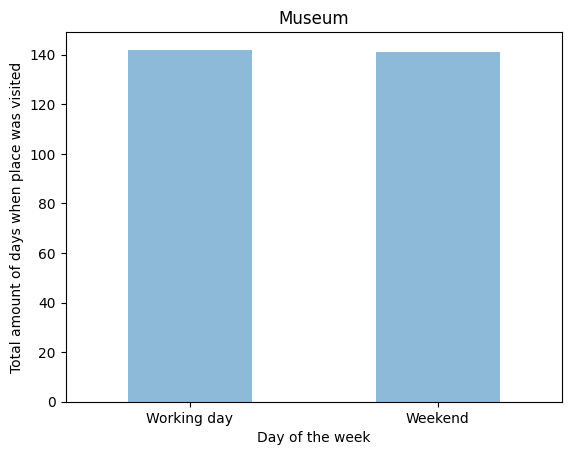

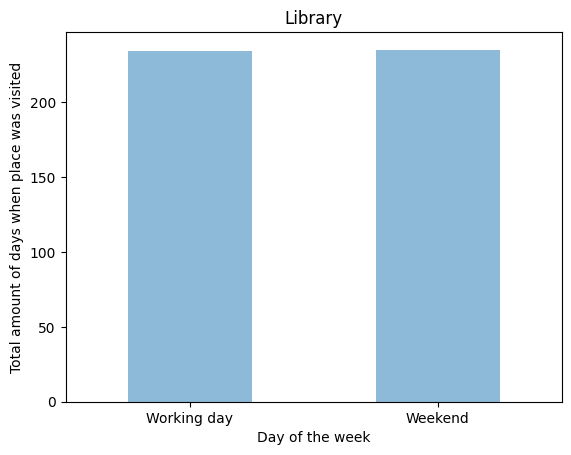

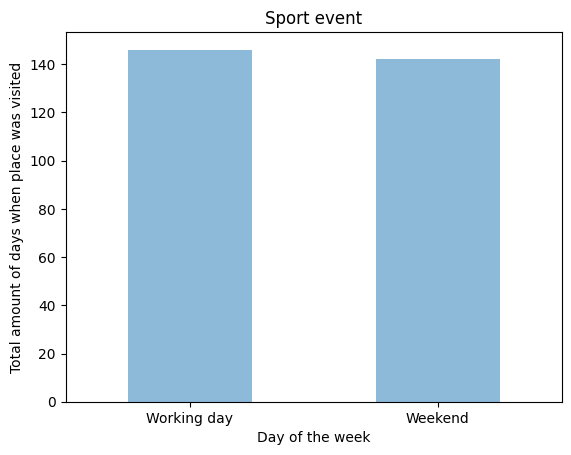

In [55]:
# Necessary imports

import pandas as P
import matplotlib.pyplot as plt

# Load data

data = P.read_csv('habits.csv',
                 sep = ';',
                 na_values = '?')

total_time_environments = data.iloc[:, [2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]]
total_time_environments = total_time_environments.fillna(0)

for column in total_time_environments:
    data = total_time_environments[column]
    row_number = 0

    for item in data:
        actual_value = 0
        
        if isinstance(item, str):
            if item.find(':') != -1:
                actual_value = item[1:2]
                total_time_environments.loc[row_number, column] = actual_value

        if column == 'H1a_A' or column == 'H1b_A' or column == 'H1g_A' or column == 'H1h_A' or column == 'H1i_A':
            if item != 1 and item != 2:
                total_time_environments.loc[row_number, column] = 0
            else:
                total_time_environments.loc[row_number, column] = (item - 2) * -1
                
        row_number += 1

total_time_environments = total_time_environments.astype(int)
grouped = total_time_environments.iloc[:, 0:14].groupby('pvknro').mean()
categorical = total_time_environments.iloc[:, [0, 14, 15, 16, 17, 18]].groupby('pvknro').sum()

grouped = grouped.rename(columns = {"V1": "Working", "V5": "Cooking", "V7": "Washing dishes", "V21": "Childcare", "V22": "Reading and playing with children", "V27": "Shopping", "V32": "Sleeping", "V33": "Dining", "V40": "Studying in school", "V68": "Reading", "V69": "Listening to radio", "V70": "Watching TV", "V75": "Phonecall"})    
categorical = categorical.rename(columns = {"H1a_A": "Cinema", "H1b_A": "Theater", "H1g_A": "Museum", "H1h_A": "Library", "H1i_A": "Sport event"})

grouped = grouped.rename(index = {1: "Working day", 2: "Weekend"})
categorical = categorical.rename(index = {1: "Working day", 2: "Weekend"})

for column in grouped:
    grouped[column].plot(kind = 'bar', alpha = 0.5)
    plt.title(f'{column}')
    plt.xlabel('Day of the week')
    plt.ylabel('Average time spent on activity (in minutes)')
    plt.xticks(rotation = 0)
    plt.show()

for column in categorical:
    categorical[column].plot(kind = 'bar', alpha = 0.5)
    plt.title(f'{column}')
    plt.xlabel('Day of the week')
    plt.ylabel('Total amount of days when place was visited')
    plt.xticks(rotation = 0)
    plt.show()

In [104]:
# Necessary imports

import pandas as P
import matplotlib.pyplot as M

# Load data

data = P.read_csv('habits.csv',
                 sep = ';',
                 na_values = '?')

total_time = data.iloc[:, [0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]]
total_time = total_time.fillna(0)

for column in total_time:
    data = total_time[column]
    row_number = 0

    for item in data:
        actual_value = 0
        
        if isinstance(item, str):
            if item.find(':') != -1:
                actual_value = item[1:2]
                total_time.loc[row_number, column] = actual_value
                
        row_number += 1

total_time = total_time.astype(int)
total_time = total_time.sort_values(by = ['kohde'])

# Check if there are multiple members within same household

print(total_time.groupby(['kohde']).size())
print(total_time.groupby(['kohde', 'jasen']).size())

# Same length, proves that there is only one input for each household

kohde
50002    2
50003    2
50004    2
50005    2
50006    2
        ..
51971    2
51973    2
51980    2
51981    2
51983    2
Length: 378, dtype: int64
kohde  jasen
50002  1        2
50003  1        2
50004  2        2
50005  1        2
50006  1        2
               ..
51971  1        2
51973  1        2
51980  1        2
51981  2        2
51983  1        2
Length: 378, dtype: int64


In [ ]:
Look at correlations between quantitative and categorical variables